## Import necessary libraries

In [113]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Find target proteins

In [2]:
# there are 4 species of malaria that cause issues in humans, so we'll search plasmodium

target_query = new_client.target.search('Plasmodium')
plasmodium_targets = pd.DataFrame.from_dict(target_query)

# find single_protein bc complex/organism is not in the scope
# pd.set_option('display.max_columns', 100)
single_protein_targets = plasmodium_targets[plasmodium_targets['target_type'] == "SINGLE PROTEIN"]
single_protein_targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Duffy antigen/chemokine receptor,15.0,False,CHEMBL2321626,"[{'accession': 'Q16570', 'component_descriptio...",SINGLE PROTEIN,9606
21,"[{'xref_id': 'P13922', 'xref_name': None, 'xre...",Plasmodium falciparum K1,Dihydrofolate reductase,7.0,False,CHEMBL1939,"[{'accession': 'P13922', 'component_descriptio...",SINGLE PROTEIN,5839
22,"[{'xref_id': 'Q02768', 'xref_name': None, 'xre...",Plasmodium falciparum,Cytochrome b,7.0,False,CHEMBL1777,"[{'accession': 'Q02768', 'component_descriptio...",SINGLE PROTEIN,5833
23,"[{'xref_id': 'P05227', 'xref_name': None, 'xre...",Plasmodium falciparum,Histidine-rich protein,7.0,False,CHEMBL1923,"[{'accession': 'P05227', 'component_descriptio...",SINGLE PROTEIN,5833
24,"[{'xref_id': 'Q25704', 'xref_name': None, 'xre...",Plasmodium falciparum,Dihydropteroate synthetase,7.0,False,CHEMBL2013,"[{'accession': 'Q25704', 'component_descriptio...",SINGLE PROTEIN,5833
...,...,...,...,...,...,...,...,...,...
130,[],Plasmodium falciparum (isolate 3D7),Plasmepsin X,7.0,False,CHEMBL4523390,"[{'accession': 'Q8IAS0', 'component_descriptio...",SINGLE PROTEIN,36329
131,[],Plasmodium falciparum (isolate 3D7),Casein kinase I,7.0,False,CHEMBL4523391,"[{'accession': 'Q8IHZ9', 'component_descriptio...",SINGLE PROTEIN,36329
132,[],Plasmodium falciparum,Glutamine amidotransferase,7.0,False,CHEMBL4523484,"[{'accession': 'Q8IJR9', 'component_descriptio...",SINGLE PROTEIN,5833
133,[],Plasmodium falciparum,P-type ATPase,7.0,False,CHEMBL4630875,"[{'accession': 'Q27724', 'component_descriptio...",SINGLE PROTEIN,5833


Now, I looked through found the specific protein that to use for the machine learning. 

I chose Dihydrofolate reductase (DHFR) for a variety of reasons, but the main ones include:
- it has been targeted before in malaria drug treatment
- it is crucial to malaria spreading
- it is in all 4 parasites

In [3]:
target_protein = single_protein_targets.target_chembl_id[21]
target_protein

'CHEMBL1939'

## Get activity data 

What's important to note is the "standard_type". We already filtered out those which are not standard_type "IC50". IC50 is a measure for how much this protein inhibits DHFR's biological process (in this case). There are other types like EC50 & Ki; however, it doesn't make sense to use those for this project.

In [4]:
activity = new_client.activity
activity_data = activity.filter(target_chembl_id=target_protein).filter(standard_type='IC50')
dhfr_data = pd.DataFrame.from_dict(activity_data)

dhfr_data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,188717,[],CHEMBL769665,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.33
1,None,None,188718,[],CHEMBL769666,In vitro antimalarial activity relative to tri...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.05
2,None,None,188719,[],CHEMBL769492,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,10.16
3,None,None,188720,[],CHEMBL769664,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.07
4,None,None,188721,[],CHEMBL769484,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,3.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,None,None,18465879,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,67.9
369,None,None,18465880,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,70.1
370,None,None,18465881,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,185.4
371,None,None,18465882,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Plasmodium falciparum K1,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,225.5


See the columns in the dataframe to get a sense for what is measured here. 

In [5]:
print(dhfr_data.columns)

Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')


There are values where standard_value is not available. See the output below for proof.

In [6]:
for value in dhfr_data['standard_value']:
    print(value)

330.0
50.0
10160.0
70.0
3400.0
30.0
15910.0
130.0
17480.0
2620.0
3830.0
30.0
5730.0
50.0
50000.0
250.0
9.3
73.0
3120.0
470.0
14580.0
110.0
6750.0
60.0
8130.0
40.0
15150.0
2270.0
17140.0
130.0
15260.0
130.0
21490.0
110.0
22730.0
3410.0
100000.0
730.0
90810.0
760.0
100000.0
500.0
150.0
20.0
4290.0
30.0
7700.0
60.0
9750.0
50.0
15220.0
2280.0
3520.0
30.0
3330.0
30.0
12750.0
60.0
19080.0
2860.0
3690.0
30.0
3517.0
30.0
29610.0
150.0
3570.0
540.0
4180.0
30.0
3460.0
30.0
3020.0
20.0
2.7
12.7
680.0
100.0
19880.0
150.0
19850.0
170.0
21120.0
110.0
5060.0
760.0
16260.0
120.0
5370.0
50.0
11300.0
60.0
2400.0
360.0
50000.0
370.0
50000.0
420.0
50000.0
250.0
4660.0
700.0
100000.0
730.0
25610.0
210.0
38020.0
190.0
310.0
50.0
27760.0
130.0
30580.0
260.0
26080.0
130.0
70.0
10.0
5010.0
40.0
13150.0
110.0
19450.0
100.0
6840.0
1030.0
25240.0
180.0
2850.0
20.0
4820.0
20.0
4480.0
670.0
4380.0
30.0
2640.0
20.0
3110.0
20.0
470.0
70.0
16590.0
120.0
14360.0
120.0
16470.0
80.0
17500.0
4300.0
19900.0
17400.0
30900.0

I can just filter them out here, so there's no issues with the machine learning.

In [63]:
dhfr_data = dhfr_data[dhfr_data.standard_value.notna()]

dhfr_data

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,standard_value_norm
0,None,None,188717,[],CHEMBL769665,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.33,330.0
1,None,None,188718,[],CHEMBL769666,In vitro antimalarial activity relative to tri...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.05,50.0
2,None,None,188719,[],CHEMBL769492,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,10.16,10160.0
3,None,None,188720,[],CHEMBL769664,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.07,70.0
4,None,None,188721,[],CHEMBL769484,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,3.4,3400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,None,None,18465879,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,67.9,67.9
369,None,None,18465880,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,70.1,70.1
370,None,None,18465881,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,185.4,185.4
371,None,None,18465882,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,225.5,225.5


Save it to a csv file so this data is here permanently.

In [8]:
dhfr_data.to_csv('dhfr.csv', index=False)

## Normalize the data for Machine Learning

In [19]:
def norm_value(input):
    norm = []
    for i in input['standard_value']:
        if float(i) > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x

In [21]:
dhfr_norm = norm_value(dhfr_data)

dhfr_norm

/var/folders/5v/7n4xvncx1519gs8d2_4pcmkc0000gn/T/ipykernel_8121/1196074366.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['standard_value_norm'] = norm


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value,standard_value_norm
0,None,None,188717,[],CHEMBL769665,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.33,330.0
1,None,None,188718,[],CHEMBL769666,In vitro antimalarial activity relative to tri...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.05,50.0
2,None,None,188719,[],CHEMBL769492,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,10.16,10160.0
3,None,None,188720,[],CHEMBL769664,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,0.07,70.0
4,None,None,188721,[],CHEMBL769484,In vitro antimalarial activity against Plasmod...,F,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,uM,UO_0000065,None,3.4,3400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,None,None,18465879,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,67.9,67.9
369,None,None,18465880,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,70.1,70.1
370,None,None,18465881,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,185.4,185.4
371,None,None,18465882,[],CHEMBL4181680,Inhibition of Plasmodium falciparum DHFR using...,B,None,None,BAO_0000190,...,Dihydrofolate reductase,5839,None,None,IC50,nM,UO_0000065,None,225.5,225.5


Make the values into pIC50 values instead of IC50 values for machine learning. Takes the log so it is easier for the model to learn off of.

In [68]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = float(i) * 1e-9 # Converts nanoMolar to Molar
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

dhfr_pIC50 = pIC50(dhfr_norm)
selection = ['canonical_smiles','molecule_chembl_id', 'pIC50']
dhfr_pIC50 = dhfr_pIC50[selection]
dhfr_pIC50.to_csv('dhfr_pIC50.csv', index=False)

dhfr_pIC50

,canonical_smiles,molecule_chembl_id,pIC50
0,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373,6.48
1,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373,7.30
2,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373,4.99
3,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373,7.15
4,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373,5.47
...,...,...,...
368,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)c4ccc5ccccc5c4)cc...,CHEMBL4213293,7.17
369,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)Cc4ccccc4)cc3)ccc2n1,CHEMBL4203015,7.15
370,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)CCc4ccccc4)cc3)cc...,CHEMBL4211317,6.73
371,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)C4CCCCC4)cc3)ccc2n1,CHEMBL4212687,6.65


## Get the PubChem Fingerprints

The PubChem fingerprints are a closer view/closer description of the molecule. This is what we use for the model to learn off of.

I used/rewrote some of this code from one of the links in my project notebook. I could likely use PubChem's online tool for fetching data (https://pubchem.ncbi.nlm.nih.gov/docs/programmatic-access) ; however, this seems to generate it way quicker.

Below are the commands I ran in the terminal to get the PaDEL tools for this. They are on the .gitignore in my repository.
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
!wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
!unzip padel.zip

All we need for this script to work is just the canocial_smiles (aka the chemical structure of it) and the molecule's ChEMBL id. 

In [70]:
selection = ['canonical_smiles','molecule_chembl_id']
dhfr_selection = dhfr_pIC50[selection]
dhfr_selection.to_csv('dhfr.smi', sep='\t', index=False, header=False)

dhfr_selection

,canonical_smiles,molecule_chembl_id
0,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373
1,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373
2,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373
3,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373
4,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,CHEMBL416373
...,...,...
368,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)c4ccc5ccccc5c4)cc...,CHEMBL4213293
369,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)Cc4ccccc4)cc3)ccc2n1,CHEMBL4203015
370,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)CCc4ccccc4)cc3)cc...,CHEMBL4211317
371,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)C4CCCCC4)cc3)ccc2n1,CHEMBL4212687


Make sure the format is correct. Show the first 5 lines of this .smi file.

In [65]:
!cat dhfr.smi | head -5

CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1	CHEMBL416373
CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1	CHEMBL416373
CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1	CHEMBL416373
CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1	CHEMBL416373
CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(OC)c1	CHEMBL416373
cat: stdout: Broken pipe


In [120]:
!cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [40]:
!bash padel.sh

Processing CHEMBL416373 in dhfr.smi (1/366). 
Processing CHEMBL416373 in dhfr.smi (2/366). 
Processing CHEMBL416373 in dhfr.smi (3/366). 
Processing CHEMBL416373 in dhfr.smi (4/366). 
Processing CHEMBL416373 in dhfr.smi (5/366). 
Processing CHEMBL416373 in dhfr.smi (6/366). 
Processing CHEMBL416373 in dhfr.smi (7/366). 
Processing CHEMBL416373 in dhfr.smi (8/366). 
Processing CHEMBL291931 in dhfr.smi (9/366). Average speed: 1.77 s/mol.
Processing CHEMBL291931 in dhfr.smi (10/366). Average speed: 0.89 s/mol.
Processing CHEMBL291931 in dhfr.smi (12/366). Average speed: 0.60 s/mol.
Processing CHEMBL291931 in dhfr.smi (11/366). Average speed: 0.60 s/mol.
Processing CHEMBL291931 in dhfr.smi (13/366). Average speed: 0.60 s/mol.
Processing CHEMBL29773 in dhfr.smi (17/366). Average speed: 0.26 s/mol.
Processing CHEMBL291931 in dhfr.smi (14/366). Average speed: 0.36 s/mol.
Processing CHEMBL291931 in dhfr.smi (16/366). Average speed: 0.30 s/mol.
Processing CHEMBL291931 in dhfr.smi (15/366). Aver

## Machine Learning

All imports for machine learning. I am just going to use a lazypredict to test every model, then select one and try to tune the hyperparameters for it.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from sklearn.base import RegressorMixin
import lazypredict
from lazypredict.Supervised import LazyRegressor

# other random imports supposedly

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

Get the inputs (the pubchem fingerprints) and get the outputs, the IC50 values.

In [102]:
inputs = pd.read_csv("descriptors_output.csv")
# inputs_sorted = inputs.sort_values(by='Name')
# inputs_sorted = inputs_sorted.drop('Name', axis=1)
inputs = inputs.drop_duplicates(subset='Name')
inputs_sorted = inputs.sort_values(by='Name')
inputs_sorted = inputs_sorted.drop('Name', axis=1)

inputs_sorted

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
84,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
343,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
291,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
345,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
26,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
323,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [103]:
outputs = pd.read_csv("dhfr_pIC50.csv")
# outputs_sorted = outputs_sorted['pIC50']
# outputs = outputs['pIC50']
# outputs = dhfr_pIC50[['molecule_chembl_id', 'standard_value']]
outputs = outputs.drop_duplicates(subset='molecule_chembl_id')
outputs = outputs.rename(columns={'molecule_chembl_id': 'Name'})
outputs_sorted = outputs.sort_values(by='Name')
outputs_sorted = outputs_sorted['pIC50']

outputs_sorted

84    5.30
58    4.72
124   5.16
344   9.41
291   5.41
      ... 
339   9.24
337   4.45
26    4.82
329   7.30
253   7.40
Name: pIC50, Length: 99, dtype: float64

If you can't tell the numbers for the ChEMBL_ID's don't add up, so we sorted the dataframes. We don't have to merge them.

In [98]:
combined = pd.merge(inputs, outputs, on='Name')

combined

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,canonical_smiles,pIC50
0,CHEMBL416373,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CCCCOc1cc(Cc2cnc(N)nc2N)ccc1OCc1cc(OC)c(OC)c(O...,6.48
1,CHEMBL291931,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,COc1ccc(Cc2cnc(N)nc2N)cc1OCc1ccccc1,4.76
2,CHEMBL29773,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,CCc1nc(N)nc(N)c1-c1cccc(OC)c1,8.03
3,CHEMBL22138,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nc1ncc(Cc2ccc(OCc3ccccc3)c(OCc3ccccc3)c2)c(N)n1,5.51
4,CHEMBL56146,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nc1ncc(Cc2ccc(OCc3ccccc3)cc2)c(N)n1,4.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,CHEMBL4203015,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)Cc4ccccc4)cc3)ccc2n1,7.15
95,CHEMBL4211317,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)CCc4ccccc4)cc3)cc...,6.73
96,CHEMBL4213293,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)c4ccc5ccccc5c4)cc...,7.17
97,CHEMBL4212687,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Nc1nc(N)c2cc(NCc3ccc(CCNC(=O)C4CCCCC4)cc3)ccc2n1,6.65


In [104]:
input_train, input_test, output_train, output_test = train_test_split(inputs_sorted, outputs_sorted, test_size=0.2)

input_train
# input_train.shape, output_train.shape, input_test.shape, output_test.shape

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
218,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
18,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
365,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
172,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
357,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
349,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [105]:
removed_regressors = [
    "TheilSenRegressor",
    "ARDRegression", 
    "CCA", 
    "IsotonicRegression", 
    "StackingRegressor",
    "MultiOutputRegressor", 
    "MultiTaskElasticNet", 
    "MultiTaskElasticNetCV", 
    "MultiTaskLasso", 
    "MultiTaskLassoCV", 
    "PLSCanonical", 
    "PLSRegression", 
    "QuantileRegressor", 
    "RadiusNeighborsRegressor", 
    "RegressorChain", 
    "VotingRegressor", 
]

REGRESSORS = [
    est
    for est in all_estimators()
    if (issubclass(est[1], RegressorMixin) and (est[0] not in removed_regressors))
]

clf = LazyRegressor(custom_metric=None, verbose=1, ignore_warnings=False, regressors = REGRESSORS)
models, predictions = clf.fit(input_train, input_test, output_train, output_test)

'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|                                                                                                                                                                                                  | 0/39 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.2084261450700411, 'Adjusted R-Squared': 1.0266358431047922, 'RMSE': 1.4669246944665837, 'Time taken': 0.028280019760131836}
{'Model': 'BaggingRegressor', 'R-Squared': 0.2789151101113293, 'Adjusted R-Squared': 1.0158939824917457, 'RMSE': 1.1331592824612562, 'Time taken': 0.029826879501342773}


 15%|████████████████████████████▌                                                                                                                                                             | 6/39 [00:00<00:03,  9.15it/s]

{'Model': 'BayesianRidge', 'R-Squared': 0.35654013004442064, 'Adjusted R-Squared': 1.0141829901730348, 'RMSE': 1.0704305530925236, 'Time taken': 0.5898430347442627}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.12177622794474163, 'Adjusted R-Squared': 1.024725926137993, 'RMSE': 1.4133537624918715, 'Time taken': 0.020673751831054688}
{'Model': 'DummyRegressor', 'R-Squared': -0.005152572987738635, 'Adjusted R-Squared': 1.0221553351354606, 'RMSE': 1.337869513730928, 'Time taken': 0.013239622116088867}
{'Model': 'ElasticNet', 'R-Squared': 0.07158223425738253, 'Adjusted R-Squared': 1.0204639646741411, 'RMSE': 1.2857883435745265, 'Time taken': 0.06860899925231934}


 21%|██████████████████████████████████████▏                                                                                                                                                   | 8/39 [00:08<00:42,  1.37s/it]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6106626081513158, 'Adjusted R-Squared': 1.008581682650957, 'RMSE': 0.8326468066111056, 'Time taken': 7.1963791847229}
{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.10705516072576948, 'Adjusted R-Squared': 1.0244014478582246, 'RMSE': 1.4040494171434519, 'Time taken': 0.01960897445678711}


 26%|███████████████████████████████████████████████▍                                                                                                                                         | 10/39 [00:08<00:28,  1.02it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.027025807801607682, 'Adjusted R-Squared': 1.0226374598007315, 'RMSE': 1.3523479332586112, 'Time taken': 0.29450130462646484}
{'Model': 'GammaRegressor', 'R-Squared': 0.45510216580135854, 'Adjusted R-Squared': 1.0120105091064666, 'RMSE': 0.9850432605721762, 'Time taken': 0.13205718994140625}


 31%|████████████████████████████████████████████████████████▉                                                                                                                                | 12/39 [00:08<00:18,  1.46it/s]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -17.441591436534303, 'Adjusted R-Squared': 1.4064851940767422, 'RMSE': 5.730558644085215, 'Time taken': 0.26831889152526855}
{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.2800200542934975, 'Adjusted R-Squared': 1.0158696275735772, 'RMSE': 1.132290759356055, 'Time taken': 0.10279703140258789}


 33%|█████████████████████████████████████████████████████████████▋                                                                                                                           | 13/39 [00:09<00:15,  1.68it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.3835211040194493, 'Adjusted R-Squared': 1.0135882819299658, 'RMSE': 1.0477480714388003, 'Time taken': 0.310513973236084}
{'Model': 'HuberRegressor', 'R-Squared': 0.6279951671431658, 'Adjusted R-Squared': 1.0081996424875637, 'RMSE': 0.8139018847136, 'Time taken': 0.06130504608154297}
{'Model': 'KNeighborsRegressor', 'R-Squared': 0.18271925817789447, 'Adjusted R-Squared': 1.0180143086944549, 'RMSE': 1.2063779645840533, 'Time taken': 0.015727758407592773}


 41%|███████████████████████████████████████████████████████████████████████████▉                                                                                                             | 16/39 [00:09<00:09,  2.50it/s]

{'Model': 'KernelRidge', 'R-Squared': -18.056349953839078, 'Adjusted R-Squared': 1.4200355558270794, 'RMSE': 5.825290969776963, 'Time taken': 0.5459527969360352}
{'Model': 'Lars', 'R-Squared': -inf, 'Adjusted R-Squared': inf, 'RMSE': inf, 'Time taken': 0.0851898193359375}


 49%|██████████████████████████████████████████████████████████████████████████████████████████▏                                                                                              | 19/39 [00:10<00:05,  3.57it/s]

LarsCV model failed to execute
cannot convert float NaN to integer
{'Model': 'Lasso', 'R-Squared': -0.005152572987738635, 'Adjusted R-Squared': 1.0221553351354606, 'RMSE': 1.337869513730928, 'Time taken': 0.09907793998718262}


 54%|███████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                     | 21/39 [00:14<00:16,  1.12it/s]

{'Model': 'LassoCV', 'R-Squared': 0.5772089282270048, 'Adjusted R-Squared': 1.0093190607467366, 'RMSE': 0.8676821574541987, 'Time taken': 4.1733880043029785}
{'Model': 'LassoLars', 'R-Squared': -0.005152572987738635, 'Adjusted R-Squared': 1.0221553351354606, 'RMSE': 1.337869513730928, 'Time taken': 0.12081003189086914}
{'Model': 'LassoLarsCV', 'R-Squared': 0.26126043070304017, 'Adjusted R-Squared': 1.0162831227571256, 'RMSE': 1.1469472490790058, 'Time taken': 0.0730428695678711}
LassoLarsIC model failed to execute
You are using LassoLarsIC in the case where the number of samples is smaller than the number of features. In this setting, getting a good estimate for the variance of the noise is not possible. Provide an estimate of the noise variance in the constructor.


 64%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                  | 25/39 [00:15<00:06,  2.26it/s]

{'Model': 'LinearRegression', 'R-Squared': -1.9048991390385195e+25, 'Adjusted R-Squared': 4.1987336011289873e+23, 'RMSE': 5824166150169.06, 'Time taken': 0.2951691150665283}
{'Model': 'LinearSVR', 'R-Squared': -0.1722428684237196, 'Adjusted R-Squared': 1.0258382998840494, 'RMSE': 1.4447961071338908, 'Time taken': 0.11425518989562988}


 74%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                               | 29/39 [00:15<00:02,  3.99it/s]

{'Model': 'MLPRegressor', 'R-Squared': -3.062275458126572, 'Adjusted R-Squared': 1.0895397142742516, 'RMSE': 2.6895674966387704, 'Time taken': 0.45398616790771484}
{'Model': 'NuSVR', 'R-Squared': 0.29237058323652243, 'Adjusted R-Squared': 1.0155974001374781, 'RMSE': 1.1225370975616291, 'Time taken': 0.039604902267456055}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -1.9526613576578318, 'Adjusted R-Squared': 1.0650818628718084, 'RMSE': 2.2930027909210176, 'Time taken': 0.02126598358154297}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.10905698087041116, 'Adjusted R-Squared': 1.024445571504104, 'RMSE': 1.4053182721521364, 'Time taken': 0.04521608352661133}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.33538772432181985, 'Adjusted R-Squared': 1.0146492264940665, 'RMSE': 1.0878823793767178, 'Time taken': 0.03217196464538574}


 79%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                      | 31/39 [00:15<00:01,  4.71it/s]

{'Model': 'PoissonRegressor', 'R-Squared': 0.5106139106691072, 'Adjusted R-Squared': 1.010786932363442, 'RMSE': 0.9335198851395254, 'Time taken': 0.22558283805847168}
RANSACRegressor model failed to execute
`min_samples` may not be larger than number of samples: n_samples = 79.


 85%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                            | 33/39 [00:16<00:01,  5.49it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.22434532785312833, 'Adjusted R-Squared': 1.0170967967178546, 'RMSE': 1.1752546266419226, 'Time taken': 0.21280598640441895}
{'Model': 'Ridge', 'R-Squared': 0.26736974906575417, 'Adjusted R-Squared': 1.0161484626075994, 'RMSE': 1.1421948211817718, 'Time taken': 0.10114502906799316}


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                   | 35/39 [00:16<00:00,  4.43it/s]

{'Model': 'RidgeCV', 'R-Squared': 0.49600204392211333, 'Adjusted R-Squared': 1.0111090036722503, 'RMSE': 0.9473536893393285, 'Time taken': 0.543860912322998}
{'Model': 'SGDRegressor', 'R-Squared': -75821795.14334644, 'Adjusted R-Squared': 1671247.0866862906, 'RMSE': 11619.696836911688, 'Time taken': 0.05221414566040039}
{'Model': 'SVR', 'R-Squared': 0.2916755858122908, 'Adjusted R-Squared': 1.0156127191062256, 'RMSE': 1.1230882115405951, 'Time taken': 0.0237882137298584}


 97%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 38/39 [00:17<00:00,  5.49it/s]

{'Model': 'TransformedTargetRegressor', 'R-Squared': -1.9048991390385195e+25, 'Adjusted R-Squared': 4.1987336011289873e+23, 'RMSE': 5824166150169.06, 'Time taken': 0.27020812034606934}


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:17<00:00,  2.22it/s]

{'Model': 'TweedieRegressor', 'R-Squared': 0.4533055464682294, 'Adjusted R-Squared': 1.0120501097646213, 'RMSE': 0.9866658504103959, 'Time taken': 0.38629794120788574}


In [106]:
# predictions = predictions[['R-Squared', 'RMSE']]
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,inf,-inf,inf,0.09
LinearRegression,419873360112898734555136.00,-19048991390385195425202176.00,5824166150169.06,0.30
TransformedTargetRegressor,419873360112898734555136.00,-19048991390385195425202176.00,5824166150169.06,0.27
SGDRegressor,1671247.09,-75821795.14,11619.70,0.05
KernelRidge,1.42,-18.06,5.83,0.55
GaussianProcessRegressor,1.41,-17.44,5.73,0.27
MLPRegressor,1.09,-3.06,2.69,0.45
OrthogonalMatchingPursuit,1.07,-1.95,2.29,0.02
AdaBoostRegressor,1.03,-0.21,1.47,0.03


## Graphs for the presentation

(0.0, 1.0)

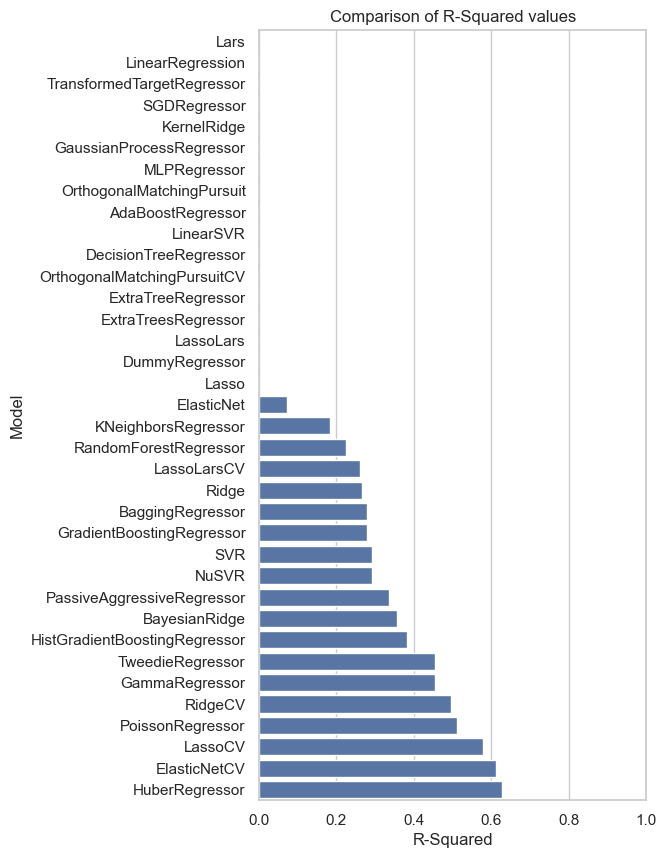

In [115]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
sns.barplot(y=predictions.index, x="R-Squared", data=predictions)
plt.title("Comparison of R-Squared values")
plt.xlim(0, 1)

(0.0, 10.0)

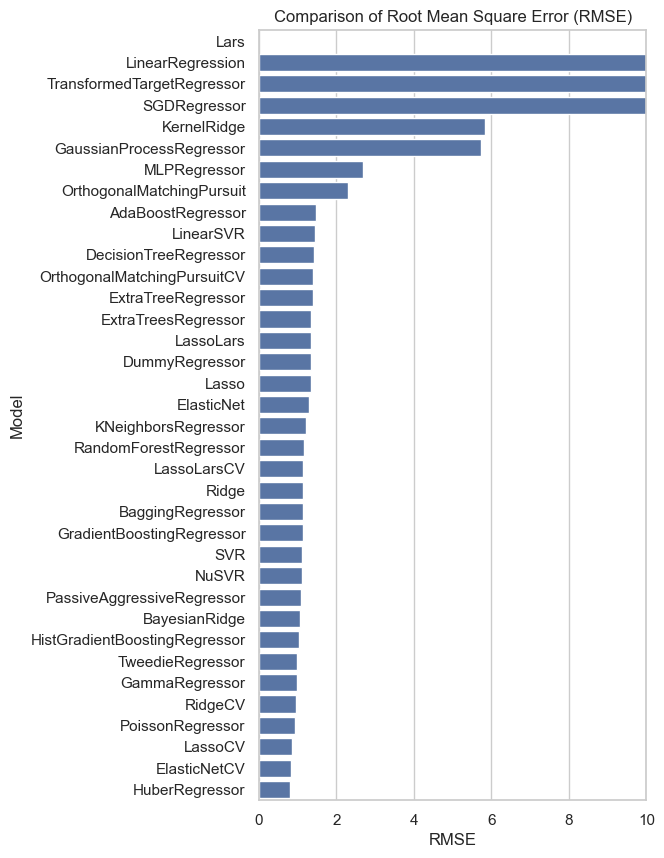

In [117]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
sns.barplot(y=predictions.index, x="RMSE", data=predictions)
plt.title("Comparison of Root Mean Square Error (RMSE)")
plt.xlim(0, 10)

In [ ]:
sns.set(color_codes=True)
sns.set_style("darkgrid")

ax = sns.regplot(x=output_test, y=Y_ccr5_pred, scatter_kws={'alpha':0.4, "color": "black"}, line_kws={"color": "red"})
ax.set_xlabel('Observed CCR5 pIC50 (mol/L)', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted CCR5 pIC50 (mol/L)', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show